In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Flatten,MaxPooling2D,Dense,Conv2D,Dropout
from tensorflow.keras.preprocessing import image,image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from time import time
import cv2
import random


In [ ]:
images =[ r'D:\Data Analytics for Business\Keras learning\COVID_19_xray\COVID',r'D:\Data Analytics for Business\Keras learning\COVID_19_xray\NORMAL']

In [ ]:
# BLUR THE IMAGES of COVID + PHOTOS
for img in os.listdir(images[0]):
    if 'blur' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        im = cv2.GaussianBlur(a,(5,5),4)
        cv2.imwrite(f'{images[0]}\{img[:-4]}_blur.jpg',im)
    # ROTATE THE IMAGE of COVID + PHOTOS
    if 'rotate' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        m= cv2.getRotationMatrix2D(((224-1)/2.,(224-1)/2.),90,1)
        im = cv2.warpAffine(a,m,(224,224))
        cv2.imwrite(f'{images[0]}\{img[:-4]}_rotate90.jpg',im)

# ***************************************************************************
# BLUR THE IMAGES of COVID - PHOTOS
for img in os.listdir(images[1]):
    if 'blur' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        im = cv2.GaussianBlur(a,(5,5),4)
        cv2.imwrite(f'{images[0]}\{img[:-4]}_blur.jpg',im)

# ROTATE THE IMAGE of COVID - PHOTOS
    if 'rotate' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        m= cv2.getRotationMatrix2D(((224-1)/2.,(224-1)/2.),90,1)
        im = cv2.warpAffine(a,m,(224,224))
        cv2.imwrite(f'{images[0]}\{img[:-4]}_rotate90.jpg',im)



In [21]:
train_ds = image_dataset_from_directory(directory=r'D:\Data Analytics for Business\Keras learning\COVID_19_xray\images',subset='training',validation_split=0.3,image_size=(224,224),batch_size=16,seed=11,color_mode='grayscale')

Found 1360 files belonging to 2 classes.
Using 952 files for training.


In [22]:
val_ds = image_dataset_from_directory(directory=r'D:\Data Analytics for Business\Keras learning\COVID_19_xray\images',subset='validation',image_size=(224,224),batch_size=16,validation_split=0.3,seed=12,color_mode='grayscale')

Found 1360 files belonging to 2 classes.
Using 408 files for validation.


In [ ]:
classes = ['covid+','covid-']

In [24]:
train_ds.shuffle(buffer_size=16)
val_ds.shuffle(16)

<ShuffleDataset shapes: ((None, 224, 224, 1), (None,)), types: (tf.float32, tf.int32)>

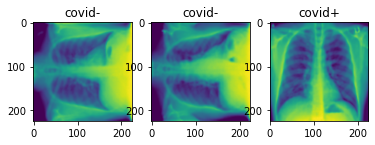

In [25]:
for im,lab in train_ds:
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(im[i].numpy().astype('uint8'))
        plt.title(classes[lab[i].numpy()])


In [26]:
model = Sequential()
model.add(Rescaling(1./255,input_shape=(224,224,1)))
model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),loss=SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [27]:
name = int(time())

In [28]:
chkpt = ModelCheckpoint(filepath=r'D:\Data Analytics for Business\Keras learning\COVID 19 xray\best_model.hdf5',monitor='val_accuracy')
tenboard = TensorBoard(log_dir=f'logs/{name}')

In [29]:
history = model.fit(train_ds,validation_data=(val_ds),epochs=50,callbacks=[tenboard,chkpt])

Epoch 1/50
60/60 [==============================] - 21s 175ms/step - loss: 0.7120 - accuracy: 0.6775 - val_loss: 0.4987 - val_accuracy: 0.7721
Epoch 2/50
60/60 [==============================] - 9s 146ms/step - loss: 0.3554 - accuracy: 0.8592 - val_loss: 0.3111 - val_accuracy: 0.8578
Epoch 3/50
60/60 [==============================] - 8s 141ms/step - loss: 0.2820 - accuracy: 0.8866 - val_loss: 0.2144 - val_accuracy: 0.9142
Epoch 4/50
60/60 [==============================] - 9s 145ms/step - loss: 0.2080 - accuracy: 0.9244 - val_loss: 0.1814 - val_accuracy: 0.9289
Epoch 5/50
60/60 [==============================] - 9s 150ms/step - loss: 0.1398 - accuracy: 0.9464 - val_loss: 0.1573 - val_accuracy: 0.9461
Epoch 6/50
60/60 [==============================] - 8s 135ms/step - loss: 0.0953 - accuracy: 0.9653 - val_loss: 0.0918 - val_accuracy: 0.9681
Epoch 7/50
60/60 [==============================] - 9s 145ms/step - loss: 0.0620 - accuracy: 0.9800 - val_loss: 0.0762 - val_accuracy: 0.9755
Epoch

In [30]:
# Function to Predict the Image

def pred_func(file):
    try_im = image.load_img(file,target_size=(224,224,1))
    try_im = image.img_to_array(try_im)
    try_im = try_im.reshape(-1,224,224,1)
    return classes[np.argmax(model.predict(try_im))]

In [38]:
file=r'D:\Data Analytics for Business\Keras learning\COVID_19_xray\images\COVID\covid_0.jpg'
pred_func(file)

'covid+'

In [ ]:
for im,lab in train_ds:
    for i in range(3):
        plt.subplot(2,3,i+1)
        plt.imshow(im[i].numpy().astype('uint8'))
        plt.title(lab[i].numpy())